In [209]:
#import scipy as sc
import pandas as pnd

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer


In [210]:
#inits
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

In [211]:
#people = pnd.read_csv('filtered.csv',header=0,index_col=False)
#people = pnd.read_csv('60_lines_after_kernel_EOBT.csv',header=0,index_col=False)
people = pnd.read_csv('100_lines_after_and_before_EOBT.csv',header=0,index_col=False)
#people = pnd.read_csv('videoGuts_crashes.csv',header=0,index_col=False)

In [213]:
#people.head()

In [214]:

import re
people['text'] = people['text'].map(lambda words: re.sub(r'\w*\d\w*', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'zonelists', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'zone', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'znusb', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'lib/', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'[\\,\/,\{,\},\[,\]]', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'read', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'kernel:', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r'Open file descriptor', '', str(words)).strip())
people['text'] = people['text'].map(lambda words: re.sub(r':', ' ', str(words)).strip())
#people['text'] = people['text'].map(lambda words: re.sub(r' +', '', str(words)).strip())

In [180]:
#people.head(60)

In [181]:
# creating cleaner dataframe
#my_df['text'] = people['text'][0:500].map(lambda x : documentCleaner(x))
#my_df['text'] = people['text'].map(lambda x : documentCleaner(x))


In [182]:
#print my_df['text'][1]

In [183]:
#my_df['tf-idf'][0]

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfModel = TfidfVectorizer(min_df=1,tokenizer=None,stop_words="english")

#print people['text'][13]
X = tfidfModel.fit_transform(people['text'])

In [219]:
print len(people)
print X.get_shape()
features = tfidfModel.get_feature_names()
#print features
print X[1:5]

168
(168, 2273)
  (0, 1822)	0.0136163288404
  (0, 612)	0.0136163288404
  (0, 1272)	0.012233865374
  (0, 1016)	0.0136163288404
  (0, 1234)	0.0136163288404
  (0, 504)	0.0128377657914
  (0, 376)	0.0128377657914
  (0, 1214)	0.0128377657914
  (0, 1127)	0.0113232599678
  (0, 1622)	0.0212862396384
  (0, 1626)	0.00944737393281
  (0, 2115)	0.00822415236392
  (0, 502)	0.0113232599678
  (0, 742)	0.00876723378417
  (0, 977)	0.0109618797564
  (0, 1719)	0.00908599372137
  (0, 66)	0.0128377657914
  (0, 1392)	0.0109618797564
  (0, 2131)	0.0128377657914
  (0, 1637)	0.0128377657914
  (0, 317)	0.0128377657914
  (0, 1170)	0.0128377657914
  (0, 1635)	0.0136163288404
  (0, 617)	0.0128377657914
  (0, 1634)	0.0136163288404
  :	:
  (3, 114)	0.0115647800365
  (3, 1737)	0.00285559519753
  (3, 1708)	0.00648243691552
  (3, 1657)	0.00689608250485
  (3, 2138)	0.00524325239197
  (3, 17)	0.201610768223
  (3, 517)	0.00871751850089
  (3, 562)	0.00876926014749
  (3, 1858)	0.00876926014749
  (3, 497)	0.00438463007375
  (3

In [208]:
#print X.A[0]
def printmaxword(rowIndex):
    #print (max(X.A[0]))
    max_number=0
    max_index=0
    for i,value in enumerate(X.A[rowIndex]):
        if ( value != 0):
            #print i,value,features[i]
            if ( value > max_number ):
                max_number = value
                max_index = i          
    print ("Rare-word is : [{}] with tfidf: {}".format(features[i],max_number))
#X.A
printmaxword(0)

Rare-word is : [zone] with tfidf: 0.888505275576


In [187]:
#from sklearn import neighbors
#knn=neighbors.KNeighborsClassifier(n_neighbors=5)

In [188]:
#knn.fit(X.A,people['name'])

In [189]:
#TEMPORARY COMMENTING
pnd.set_option('display.max_colwidth', -1)
#index=1
#print people.loc[index]['name']
#a = knn.predict(X.A[index])
#print a

# NOT REQUIRED
#print a.shape
#print ("{}".format(people[people['name'] == 'Ben Stratton']['text']))
#print knn.classes_

In [224]:
#TEMPORARY COMMENTING
#print knn.predict(X.A[33:35])
#print people.loc[33:35]['name']

#print knn.get_params

#COMMENTED CODE : NOT REQUIRED
#print knn.classes_
#for i,value in enumerate(X.A[0]):
#    if (value != 0):
#        print "i{}:value{}".format(i,value
#X.A[5]
#print people['text'][7]
#print ("*"*80)
#print people['text'][51]

In [193]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(3, 0.4)
neigh.fit(X.A)
print neigh.kneighbors(X.A[0],return_distance=True)

for i in range(5,10):
    #print "prediction neighbour of ::: {}".format(people.loc[i]['name'])
    #print ("is",neigh.kneighbors(X.A[0]))
    print ("=" *80)
    print "For [{}] neighbours are".format(people.loc[i]['name'])
    print [neigh.kneighbors(X.A[i],return_distance=True)]
    print [people.loc[j]['name'] for j in neigh.kneighbors(X.A[i],return_distance=False)]
    #for j in neigh.kneighbors(X.A[i],return_distance=False):
    #    printmaxword(j)
    
    #print [people.loc[j]['text'] for j in neigh.kneighbors(X.A[i],return_distance=False)]
    print ("=" *80)
    print ("\n")



(array([[ 0.        ,  0.        ,  0.08805333]]), array([[119,   0,  81]]))
For [/.cheats/cmd/logScripts/74800019025D46D/all.txt-2011-05-09 00:27:32 056439 ] neighbours are
[(array([[ 0.        ,  0.08547058,  0.12365308]]), array([[ 5, 14, 15]]))]
[5     /.cheats/cmd/logScripts/74800019025D46D/all.txt-2011-05-09 00:27:32 056439 
14    /.cheats/cmd/logScripts/7EB0000001E9346/all.txt-2011-11-05 04:44:37 091835 
15    /.cheats/cmd/logScripts/7EB0000001E9346/all.txt-2011-11-11 08:17:08 789035 
Name: name, dtype: object]


For [/.cheats/cmd/logScripts/7DB2001901F31C0/all.txt-2016-02-19 03:28:34 149026 ] neighbours are
[(array([[ 0.        ,  0.08668691,  0.09126656]]), array([[  6,  16, 118]]))]
[6      /.cheats/cmd/logScripts/7DB2001901F31C0/all.txt-2016-02-19 03:28:34 149026 
16     /.cheats/cmd/logScripts/8F00000001EF255/all.txt-2016-02-24 13:09:09 039275 
118    /.cheats/cmd/logScripts/8400001901F5EA2/all.txt-2016-02-14 08:59:03 058033 
Name: name, dtype: object]


For [/.cheats/cmd/l

//anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaco




For [/.cheats/cmd/logScripts/7F80000001E35F4/all.txt-2011-04-12 19:14:35 074658 ] neighbours are
[(array([[ 0.        ,  0.79045155,  0.81938358]]), array([[ 9,  8, 44]]))]
[9     /.cheats/cmd/logScripts/7F80000001E35F4/all.txt-2011-04-12 19:14:35 074658 
8     /.cheats/cmd/logScripts/7F80000001E2F4F/all.txt-2011-05-31 03:33:19 314280 
44    /.cheats/cmd/logScripts/7D60001901E49B7/all.txt-2011-07-29 17:02:53 089886 
Name: name, dtype: object]




//anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [200]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import mixture

dpgmm = mixture.DPGMM(n_components=5, covariance_type='full')
dpgmm.fit(X.A)



DPGMM(alpha=1.0, covariance_type='full', init_params='wmc', min_covar=None,
   n_components=5, n_iter=10, params='wmc', random_state=None, thresh=None,
   tol=0.001, verbose=0)

In [197]:
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])

for i, (clf, title) in enumerate([(dpgmm, 'Dirichlet Process GMM')]):
    splot = plt.subplot(2, 1, 1 + i)
    Y_ = clf.predict(X.A)
    #for i, (mean, covar, color) in enumerate(zip(
    #        clf.means_, clf._get_covars(), color_iter)):
    #    v, w = linalg.eigh(covar)
    #   u = w[0] / linalg.norm(w[0])
    #    # as the DP will not use every component it has access to
    #    # unless it needs it, we shouldn't plot the redundant
    #    # components.
    #    if not np.any(Y_ == i):
    #        continue
    #    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 0], .8, color=color)

        # Plot an ellipse to show the Gaussian component
    #    angle = np.arctan(u[1] / u[0])
    #    angle = 180 * angle / np.pi  # convert to degrees
    #    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    #    ell.set_clip_box(splot.bbox)
    #    ell.set_alpha(0.5)
    #    splot.add_artist(ell)

    #plt.xlim(-10, 10)
    #plt.ylim(-3, 6)
    #plt.xticks(())
    #plt.yticks(())
    #plt.title(title)

#plt.show()

DPGMM(alpha=1.0, covariance_type='full', init_params='wmc', min_covar=None,
   n_components=5, n_iter=10, params='wmc', random_state=None, thresh=None,
   tol=0.001, verbose=0)

In [201]:
dpgmm.predict(X.A)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

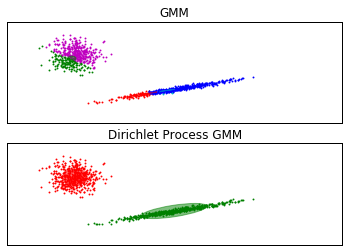

In [174]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import mixture

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a mixture of Gaussians with EM using five components
gmm = mixture.GMM(n_components=5, covariance_type='full')
gmm.fit(X)

# Fit a Dirichlet process mixture of Gaussians using five components
dpgmm = mixture.DPGMM(n_components=5, covariance_type='full')
dpgmm.fit(X)

color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])

for i, (clf, title) in enumerate([(gmm, 'GMM'),
                                  (dpgmm, 'Dirichlet Process GMM')]):
    splot = plt.subplot(2, 1, 1 + i)
    Y_ = clf.predict(X)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-10, 10)
    plt.ylim(-3, 6)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plt.show()